<a href="https://colab.research.google.com/github/SIMA-SOIL/SIMA-SOIL/blob/main/Copy_of_01_Simple_neural_network(mlp)_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">به نام خدا</div></center>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">مقدمه‌ای بر شبکه‌های عصبی و چارچوب Keras (کراس)</div></center></h1>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">


In [ ]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
!wget https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat -P dataset

--2024-03-02 16:23:54--  https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2024-03-02 16:23:54 (48.1 MB/s) - ‘dataset.py’ saved [917/917]

--2024-03-02 16:23:54--  https://github.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/deeplearning-tensorflow2-notebooks/master/

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

from dataset import load_hoda

In [ ]:
y_train_original[:4]

array([6, 5, 0, 2], dtype=uint8)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>

In [ ]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

In [ ]:
y_train_original[:3]

array([6, 5, 0], dtype=uint8)

In [ ]:
# Preprocess input data for Keras.
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [ ]:
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نرمال سازی مقادیر به مقدار بین 0 و 1
</div>

In [ ]:
x_train = x_train_original.astype('float32')
x_test = x_test_original.astype('float32')
x_train /= 255
x_test /= 255

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تعریف معماری مدل (model architecture)</div>

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               2600      
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 10)                2010      
                                                                 
Total params: 24810 (96.91 KB)
Trainable params: 24810 (96.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


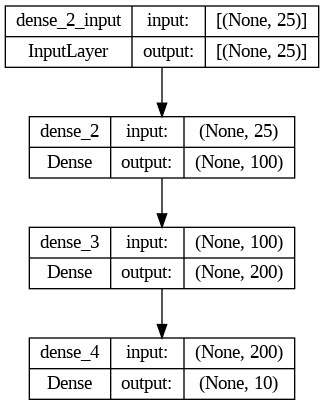

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">Compile model</div>


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">آموش مدل با داده‌های آموزشی</div>


In [ ]:
1000*0.8

800.0

In [ ]:
import math
math.ceil((800/64))

13

In [ ]:
history = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_split=0.2)

Epoch 1/100
13/13 [==============================] - 2s 32ms/step - loss: 2.0022 - accuracy: 0.4425 - val_loss: 1.7032 - val_accuracy: 0.6250
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 1.4379 - accuracy: 0.7337 - val_loss: 1.1726 - val_accuracy: 0.7950
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.9834 - accuracy: 0.8138 - val_loss: 0.8339 - val_accuracy: 0.8050
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.7133 - accuracy: 0.8363 - val_loss: 0.6398 - val_accuracy: 0.8150
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.5550 - accuracy: 0.8625 - val_loss: 0.5401 - val_accuracy: 0.8550
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.4716 - accuracy: 0.8675 - val_loss: 0.4911 - val_accuracy: 0.8650
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.4162 - accuracy: 0.8875 - val_loss: 0.4724 - val_accuracy: 0.8600
Epoch 8/10

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

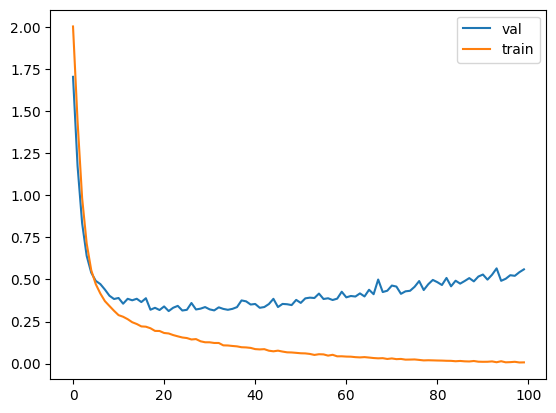

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val', 'train'])

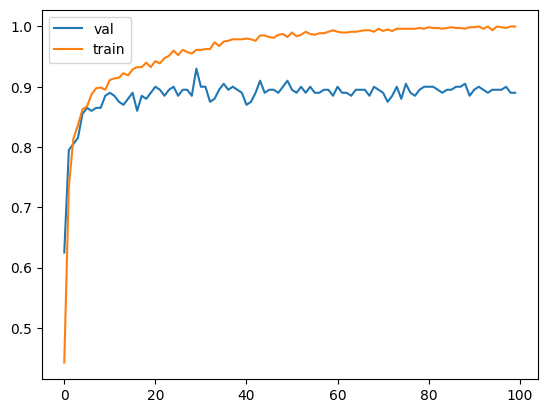

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val', 'train'])

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">ارزیابی مدل روی داده های آزمون</div>

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

7/7 [==============================] - 0s 4ms/step - loss: 0.3831 - accuracy: 0.9100

Testing loss: 0.38, acc: 0.91%


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیش‌بینی داده‌های آموزشی</div>


In [ ]:
x_test.shape

(200, 25)

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted = model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
predicted_classes = np.argmax(predicted, axis=1)

In [ ]:

print("predicted:")
print(predicted_classes)
print("True Label:")
print(y_test_original)

predicted:
[7 2 3 5 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 9 4 8 8 4 7 2 1 2 7 9 0 3 7 5 7 5 2 9 8 2 9 8 8 6 6 6 6 6 3 4 2 4 4 5 9 1
 8 4 0 5 6 2 4 6 2 7 7 7 7 1 8 1 7 8 7 7 8 9 7 2 3 1 0 2 9 6 3 5 5 0 0 9 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 9 5 2 9 0 3 1 8 2 2 3 5 2 8 3 8 6
 7 0 9 9 0 7 6 5 4 4 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 6 3 0 5 6 9 5]
True Label:
[7 2 3 1 5 5 4 7 3 2 0 8 8 0 2 9 3 6 7 4 0 3 6 3 9 2 7 5 2 9 7 5 5 8 9 6 5
 1 4 8 8 4 7 7 1 2 7 9 0 3 7 4 7 5 2 9 8 2 9 8 8 6 6 6 6 6 2 4 3 4 4 5 9 1
 8 2 0 5 6 2 4 3 2 7 7 7 7 1 8 1 7 8 7 7 8 9 3 2 3 1 0 2 9 6 3 5 5 0 0 3 6
 7 9 3 9 9 8 7 9 2 5 2 5 5 9 6 9 2 0 3 7 6 5 2 9 0 4 1 8 2 2 3 0 2 9 3 8 6
 7 0 9 9 0 7 6 5 4 7 9 3 7 0 7 1 9 4 7 3 4 1 5 6 7 9 1 3 5 4 5 7 4 1 3 3 1
 2 3 3 8 9 6 7 7 2 3 0 1 4 9 5]


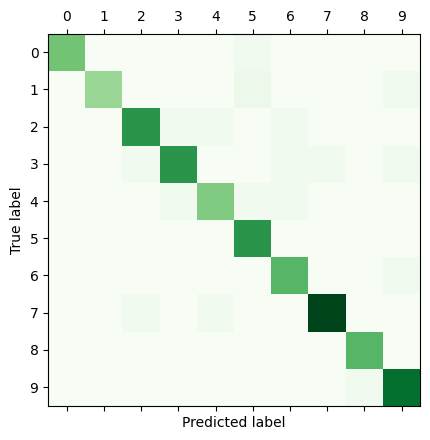

In [ ]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test_original, predicted_classes), cmap="Greens")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");

In [ ]:
#Secend way for prediction but It is simple
p = model.predict(x_test)
result = np.argmax(p, axis=-1)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_test_original == result

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
np.sum(y_test_original == result)/200

0.91